In [12]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt


In [2]:
dg_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/Demographics.csv')
dg_df.head(16)

,ID,Gender,HbA1c
0,13,MALE,5.7
1,1,FEMALE,5.5
2,3,FEMALE,5.9
3,4,FEMALE,6.4
4,5,FEMALE,5.7
5,2,MALE,5.6
6,6,FEMALE,5.8
7,7,FEMALE,5.3
8,8,FEMALE,5.6
9,10,FEMALE,6.0


추후 Feature Enginnering에 이용될 계산 함수 정의

In [4]:
df = pd.read_csv(r'./features.csv', sep='\t', encoding='utf-8')

In [5]:
df = df.dropna().drop(columns=['Unnamed: 0']).reset_index(drop=True)

In [6]:
df.isna().sum()

calories2hr       0
protein2hr        0
sugar2hr          0
carbs2hr          0
calories8hr       0
                 ..
ID                0
HbA1c             0
Biological Sex    0
WakeTime          0
label             0
Length: 72, dtype: int64

In [7]:
df['Biological Sex'] = df['Biological Sex'].map({'FEMALE': 0, 'MALE': 1})

label
PersNorm    71.112072
PersHigh    15.202422
PersLow     13.685506
Name: proportion, dtype: float64


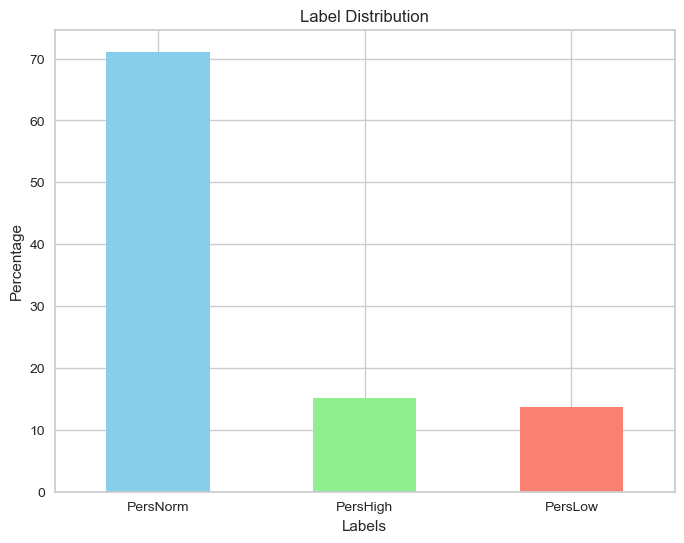

In [19]:

# label_distribution = df['label'].value_counts(normalize=True) * 100
# print(label_distribution)

# plt.figure(figsize=(8, 6))
# label_distribution.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
# plt.title('Label Distribution')
# plt.xlabel('Labels')
# plt.ylabel('Percentage')
# plt.xticks(rotation=0)
# plt.show()

In [8]:
df['label'] = df['label'].map({'PersLow': 0, 'PersNorm': 1, 'PersHigh':2})

In [9]:
##추가
df['datetime'] = pd.to_datetime(df['datetime']) #datetime 변환

# 변수와 라벨 분리 (glucose 제외) -> 실제 모델을 이용한 예측 시에는 , cgm 데이터(직접 뽑아낸 혈당값)을 사용하지 않음
df = df.drop(columns=['datetime', 'glucose'])

## pycaret 해보기

In [10]:
from pycaret.classification import *

# PyCaret 환경 설정 (7:3 비율로 일단 설정) (train이랑 fold랑 중복으로 필요한지 다시 체크)
exp_clf = setup(data=df, 
                target='label', 
                session_id=123, 
                train_size=0.7, 
                fold_strategy='stratifiedkfold',
                fix_imbalance=True,
                fix_imbalance_method='smote'
                )

# 모델 비교 및 최적 모델 선택
best_model = compare_models() #모델 여러개 적용시켜 보고, 각 모델 별 수치값 뽑기 작업


,Description,Value
0,Session id,123
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(30061, 70)"
4,Transformed data shape,"(53908, 70)"
5,Transformed train set shape,"(44889, 70)"
6,Transformed test set shape,"(9019, 70)"
7,Numeric features,69
8,Preprocess,True
9,Imputation type,simple


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:33:16
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8771,0.9449,0.8771,0.8779,0.8774,0.7297,0.7299,3.5440
dt,Decision Tree Classifier,0.7974,0.7935,0.7974,0.8083,0.8015,0.5730,0.5750,0.7060
knn,K Neighbors Classifier,0.7834,0.9010,0.7834,0.8342,0.7945,0.5913,0.6120,0.7410
ada,Ada Boost Classifier,0.5298,0.0000,0.5298,0.6573,0.5620,0.2061,0.2268,2.0740
lr,Logistic Regression,0.4797,0.0000,0.4797,0.6652,0.5170,0.1838,0.2147,2.1420
ridge,Ridge Classifier,0.4750,0.0000,0.4750,0.6686,0.5111,0.1858,0.2192,0.0940
svm,SVM - Linear Kernel,0.3878,0.0000,0.3878,0.6690,0.3879,0.1066,0.1454,1.2210
qda,Quadratic Discriminant Analysis,0.3604,0.0000,0.3604,0.6614,0.3676,0.1299,0.1869,0.1240
nb,Naive Bayes,0.3148,0.6438,0.3148,0.6846,0.3108,0.1077,0.1604,0.0960


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# 최적 모델 학습
final_model = finalize_model(best_model)

# 모델 성능 평가
predictions = predict_model(final_model)
print(predictions)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


       calories2hr  protein2hr   sugar2hr  carbs2hr  calories8hr  protein8hr  \
6650      0.000000    0.000000   0.000000       0.0     0.000000    0.000000   
26393     0.000000    0.000000   0.000000       0.0   740.000000   28.400000   
27691     0.000000    0.000000   0.000000       0.0     0.000000    0.000000   
13946   233.300003    3.300000   8.300000      35.0   618.299988   12.600000   
9921      0.000000    0.000000   0.000000       0.0     0.000000    0.000000   
...            ...         ...        ...       ...          ...         ...   
17166   556.299988   32.799999  14.400000      28.5   824.599976   48.599998   
22951   362.000000    3.200000  44.000000      66.0  2400.000000  101.199997   
7382      0.000000    0.000000   0.000000       0.0   509.000000   55.299999   
1092    489.000000   18.500000  19.700001      53.0   719.000000   31.500000   
21258     0.000000    0.000000   0.000000       0.0   280.000000    8.000000   

         sugar8hr    carbs8hr  calories

In [ ]:
# 모델 저장
save_model(final_model, 'best_pycaret_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['calories2hr', 'protein2hr',
                                              'sugar2hr', 'carbs2hr',
                                              'calories8hr', 'protein8hr',
                                              'sugar8hr', 'carbs8hr',
                                              'calories24hr', 'protein24hr',
                                              'sugar24hr', 'carbs24hr', 'eat',
                                              'eatcnt2hr', 'eatcnt8hr',
                                              'eatcnt24hr', 'eatmean2hr',
                                              'eatmean8hr', 'eatmean24hr',
                                              'acc_mean...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini